In [6]:
import pandas as pd

def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print(f'Dataframe shape: {df.shape}')
        print(f'Dataframe columns: {df.columns.tolist()}')
        df.info()
        return df

    except Exception as e:
        print(f'Error Loading data: {e}')
    return None

In [59]:
import joblib
df = joblib.load('df_chosen_features.csv')


In [60]:
df.shape

(1000000, 5)

In [9]:
df.head(7)

,tcp.srcport,tcp.dstport,tcp.len,tcp.window_size,tcp.flags.syn
0,43312.0,80.0,152.0,64512.0,0.0
1,80.0,48988.0,1200.0,49792.0,0.0
2,55468.0,80.0,0.0,64512.0,0.0
3,42394.0,80.0,187.0,64512.0,0.0
4,80.0,56988.0,1204.0,26176.0,0.0
5,80.0,47708.0,1448.0,49792.0,0.0
6,80.0,49606.0,580.0,5824.0,0.0


In [10]:
df.describe()

,tcp.srcport,tcp.dstport,tcp.len,tcp.window_size,tcp.flags.syn
count,998778.000000,998778.000000,998778.000000,9.987780e+05,998778.000000
mean,23443.695632,24976.062415,524.641143,5.787021e+04,0.034675
std,24013.458011,24017.629835,502.094287,4.366124e+04,0.182956
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,80.000000,80.000000,134.000000,5.408000e+04,0.000000
50%,14442.000000,34310.000000,350.000000,6.412800e+04,0.000000
75%,46638.000000,47568.000000,667.000000,6.451200e+04,0.000000
max,65535.000000,65535.000000,1460.000000,1.518592e+06,1.000000


In [17]:
for col in df.columns.tolist():
    print(f' ** Column {col} : \n  {df[col].value_counts()}')


 ** Column tcp.srcport : 
  tcp.srcport
80.0       494440
34310.0       366
41118.0       280
54454.0       256
48024.0       247
            ...  
7038.0          1
12375.0         1
5479.0          1
54089.0         1
12283.0         1
Name: count, Length: 29393, dtype: int64
 ** Column tcp.dstport : 
  tcp.dstport
80.0       461736
34310.0      1573
54454.0       995
42040.0       599
41118.0       586
            ...  
9613.0          1
44963.0         1
6363.0          1
27388.0         1
36711.0         1
Name: count, Length: 29385, dtype: int64
 ** Column tcp.len : 
  tcp.len
0.0       219006
1448.0    139073
207.0       8872
596.0       6074
642.0       5720
           ...  
41.0           3
1384.0         2
838.0          2
22.0           2
754.0          1
Name: count, Length: 1447, dtype: int64
 ** Column tcp.window_size : 
  tcp.window_size
64512.0      427184
64128.0      223801
64240.0       27610
0.0           21902
6912.0        10285
              ...  
385024.0       

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tcp.srcport      998778 non-null  float64
 1   tcp.dstport      998778 non-null  float64
 2   tcp.len          998778 non-null  float64
 3   tcp.window_size  998778 non-null  float64
 4   tcp.flags.syn    998778 non-null  float64
dtypes: float64(5)
memory usage: 38.1 MB


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

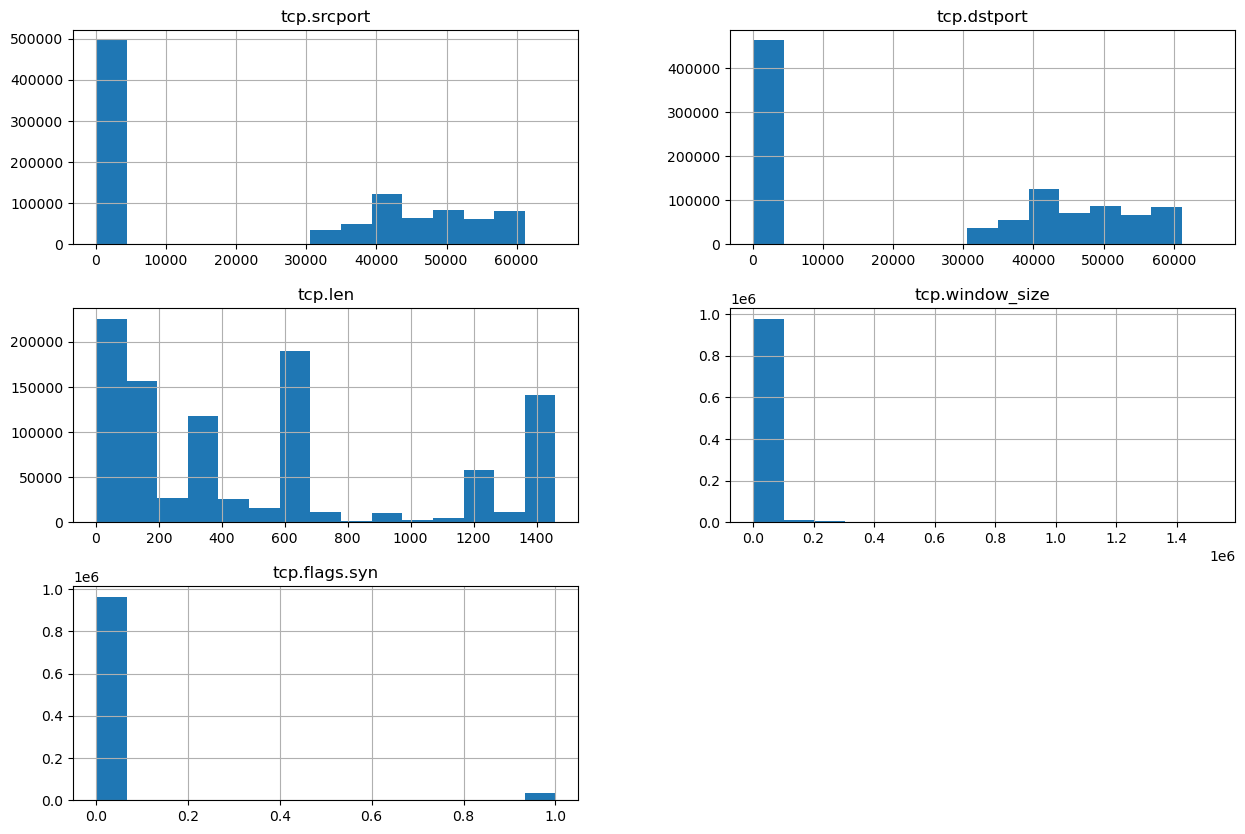

In [61]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

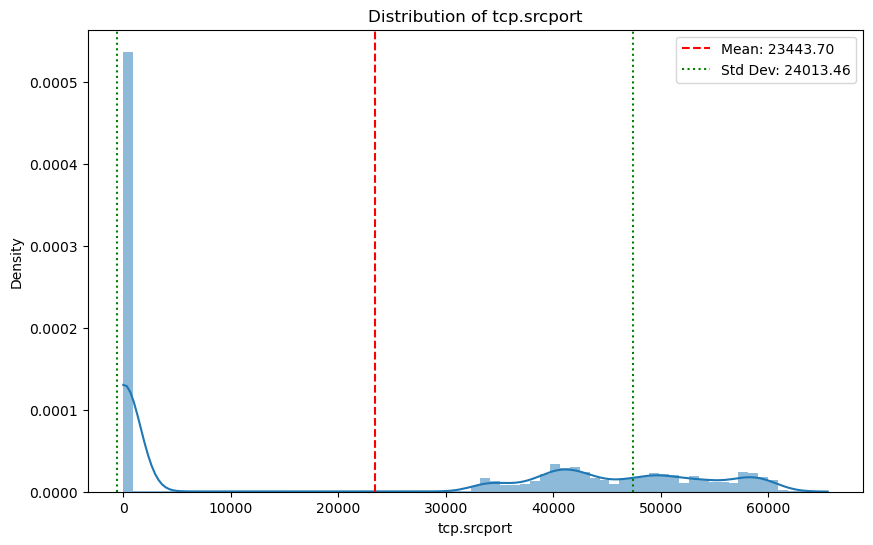

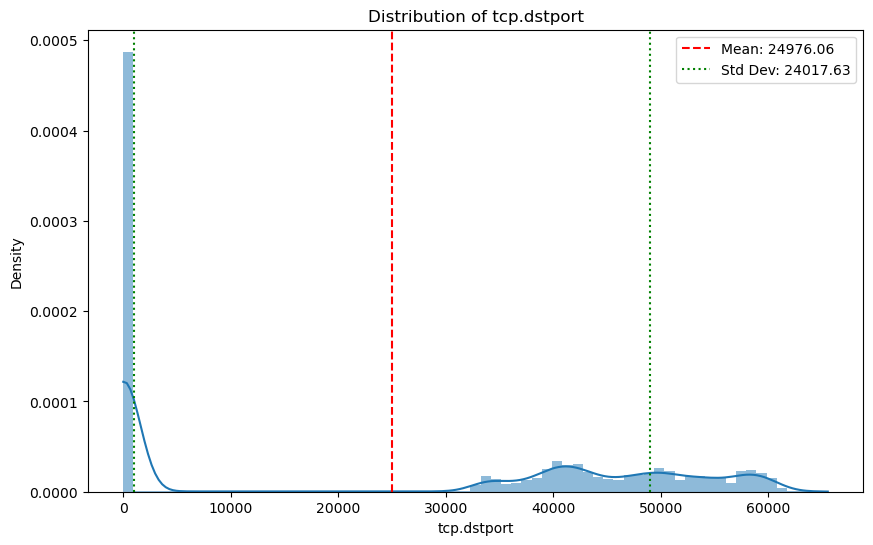

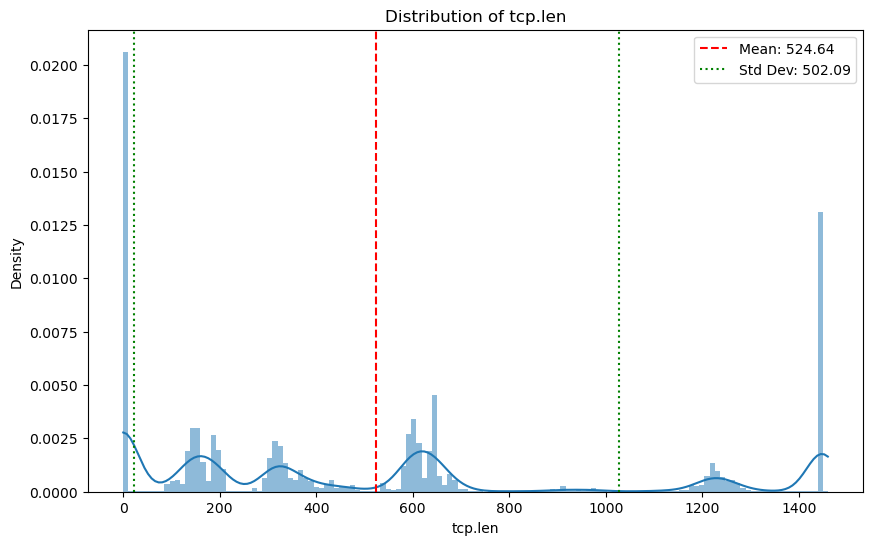

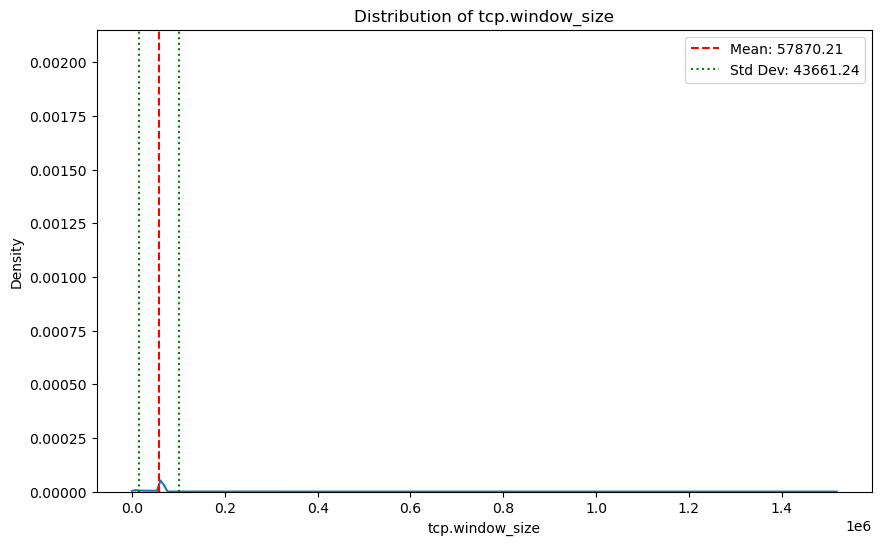

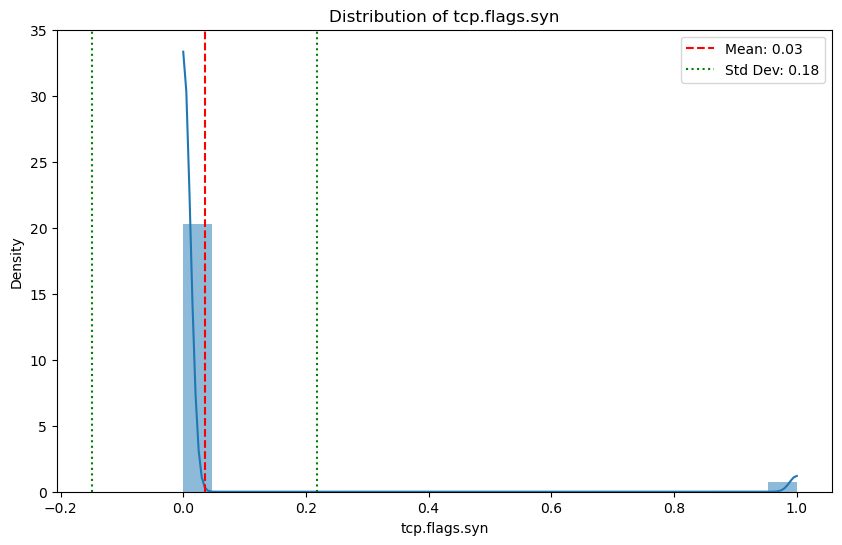

In [23]:

features = df.columns.tolist()

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, stat="density", linewidth=0)

    # Calculate mean and standard deviation
    mean_value = df[feature].mean()
    std_deviation = df[feature].std()

    # Plot vertical lines for mean and std deviation
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_deviation, color='g', linestyle=':', label=f'Std Dev: {std_deviation:.2f}')
    plt.axvline(mean_value - std_deviation, color='g', linestyle=':')

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


I would like to scale the features before plotting

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [27]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns = features)

#  Needs to be fixed forgot to appl in the scaled_df

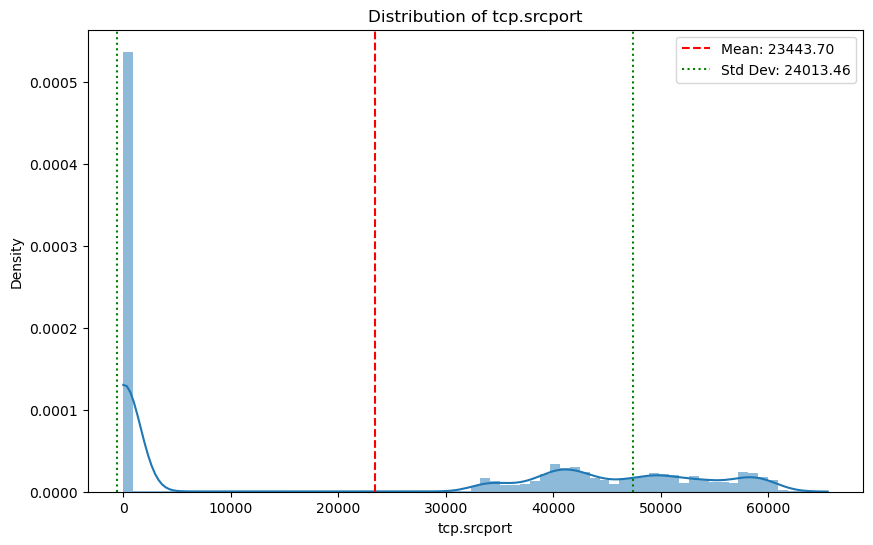

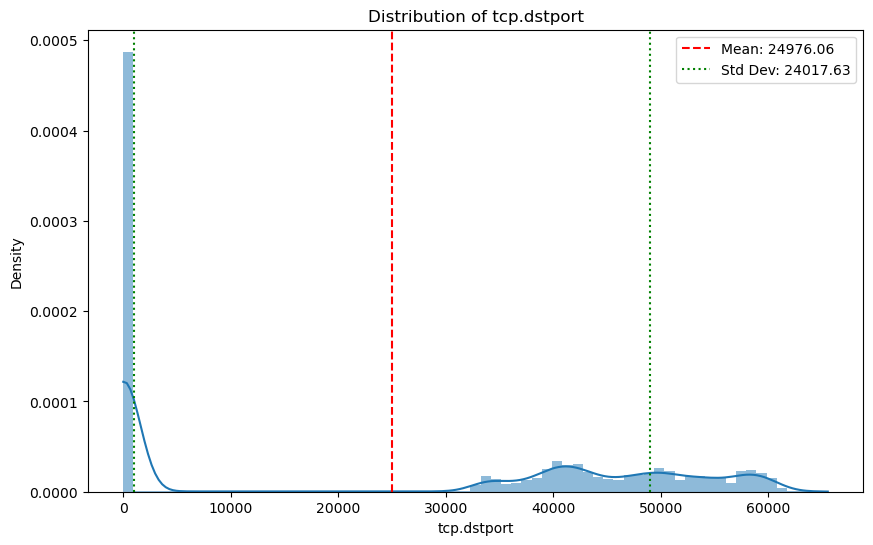

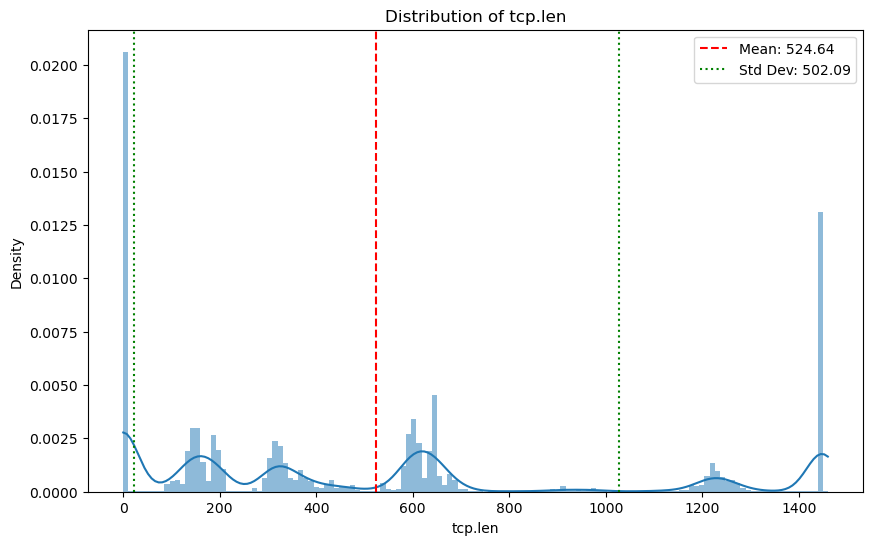

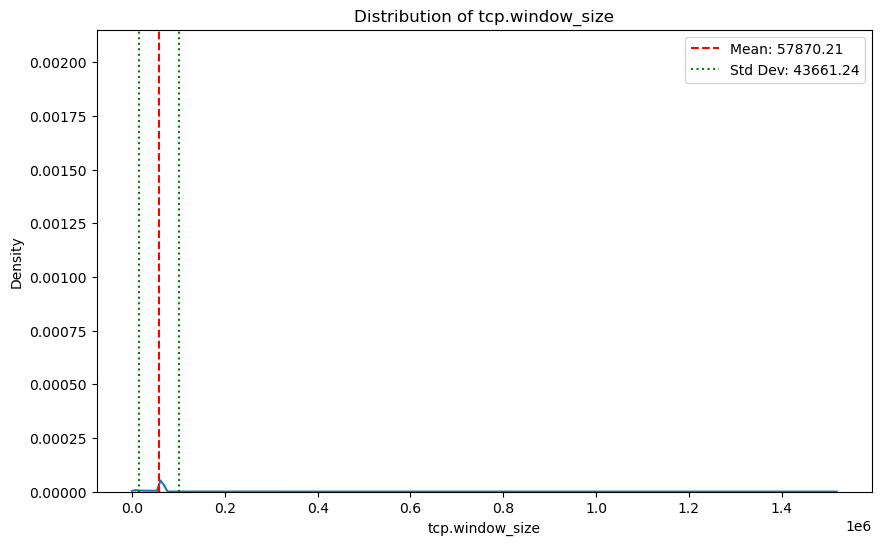

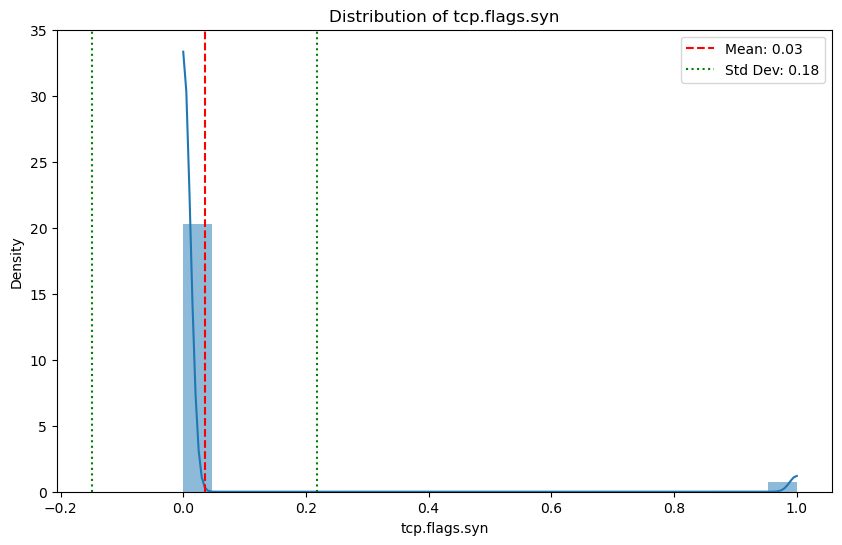

In [28]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, stat="density", linewidth=0)

    # Calculate mean and standard deviation
    mean_value = df[feature].mean()
    std_deviation = df[feature].std()

    # Plot vertical lines for mean and std deviation
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_deviation, color='g', linestyle=':', label=f'Std Dev: {std_deviation:.2f}')
    plt.axvline(mean_value - std_deviation, color='g', linestyle=':')

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


I cannot see a clean Gaussian distribution in any of the features.

I would like to see the paiplot of the features

/media/sumanas/Storage/envs/lowl-jaja-test/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


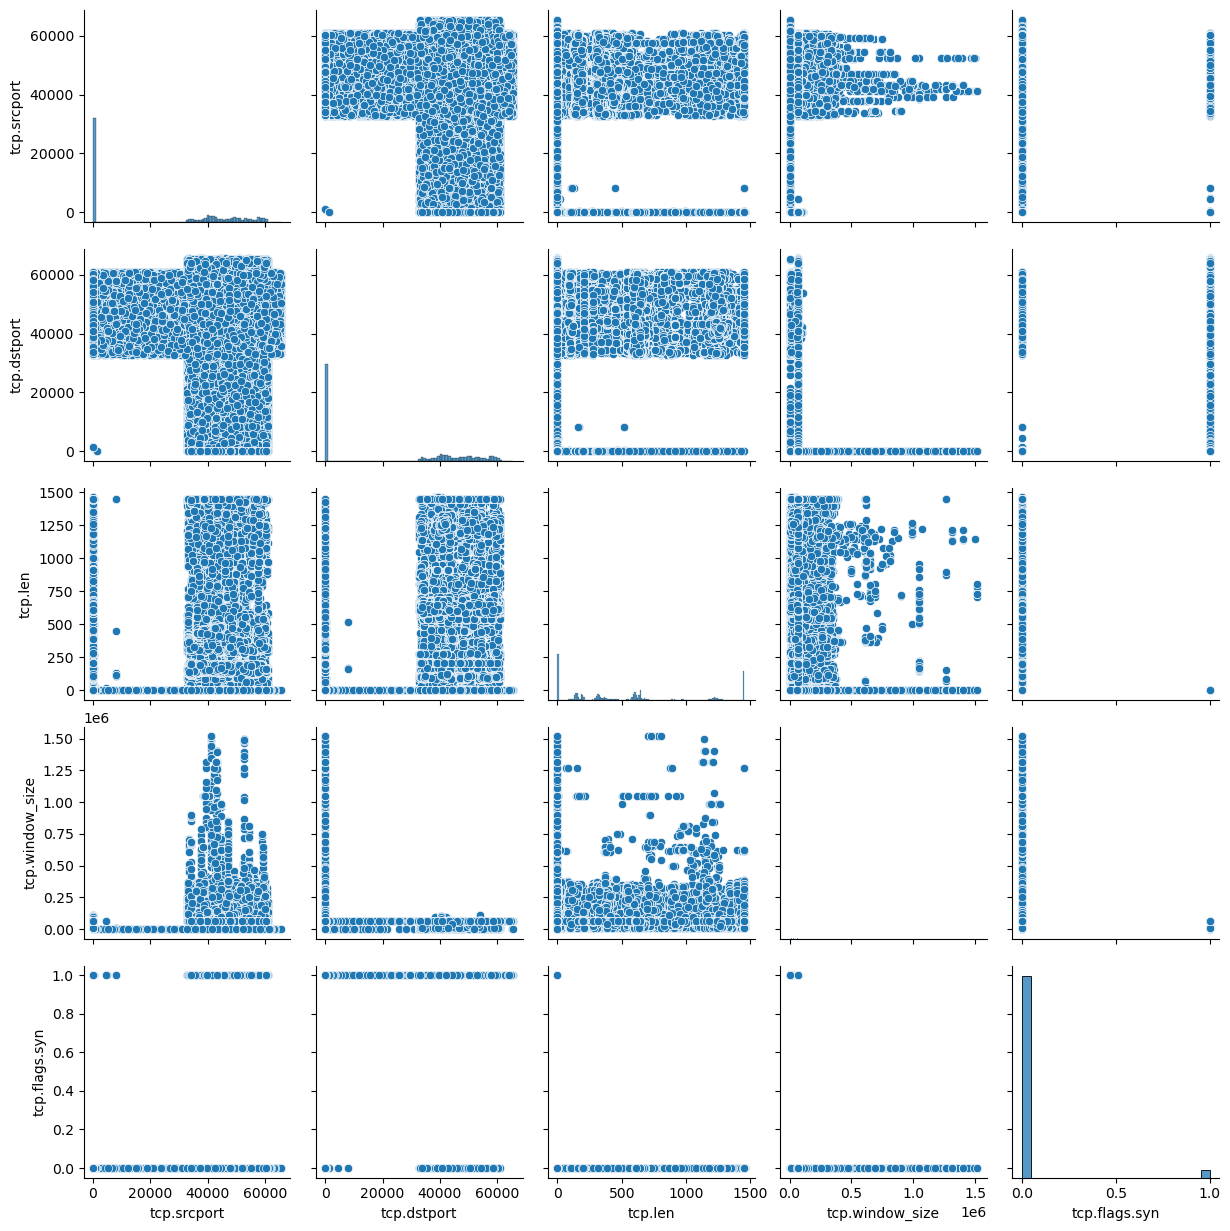

In [42]:
sns.pairplot(df)
plt.show()

Some points stand out.

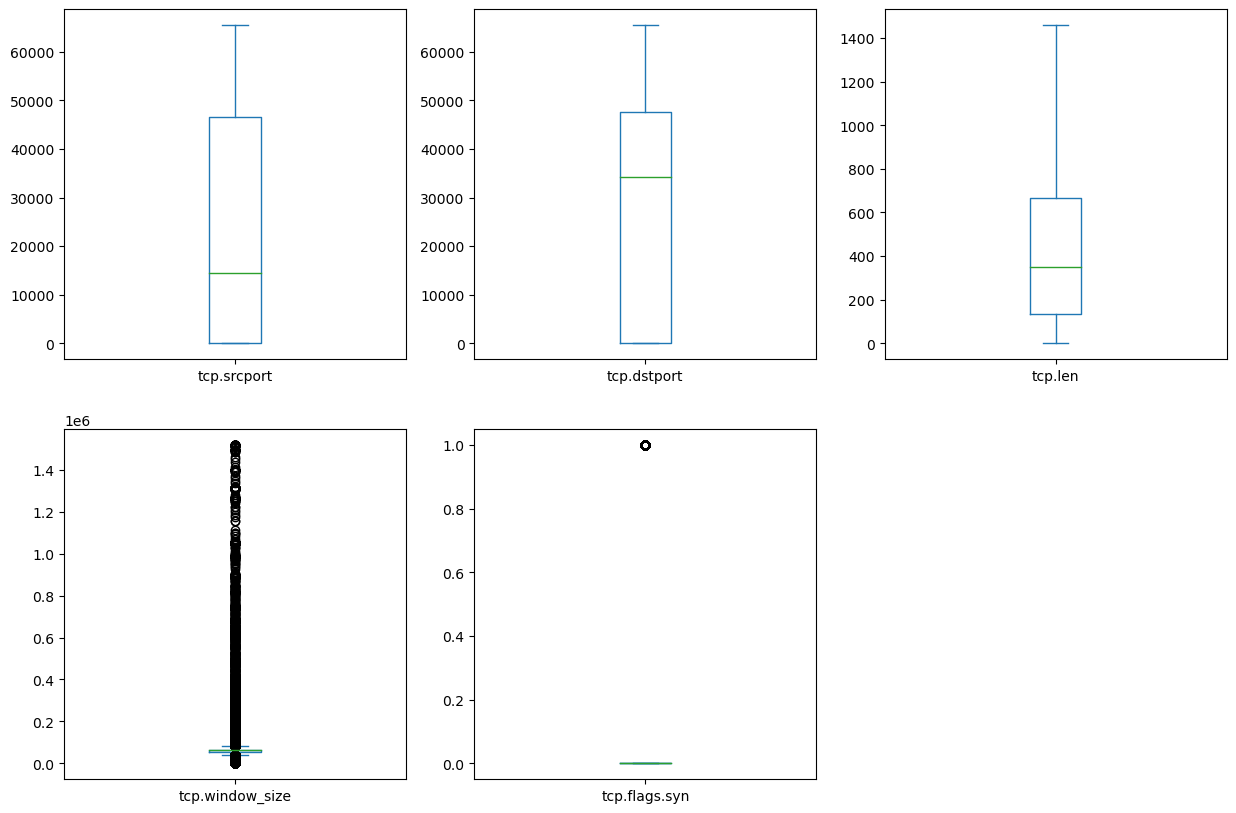

In [43]:
# Boxplot for outlier detection
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(15, 10))
plt.show()



Let's proceed with the corelation analysis of the features

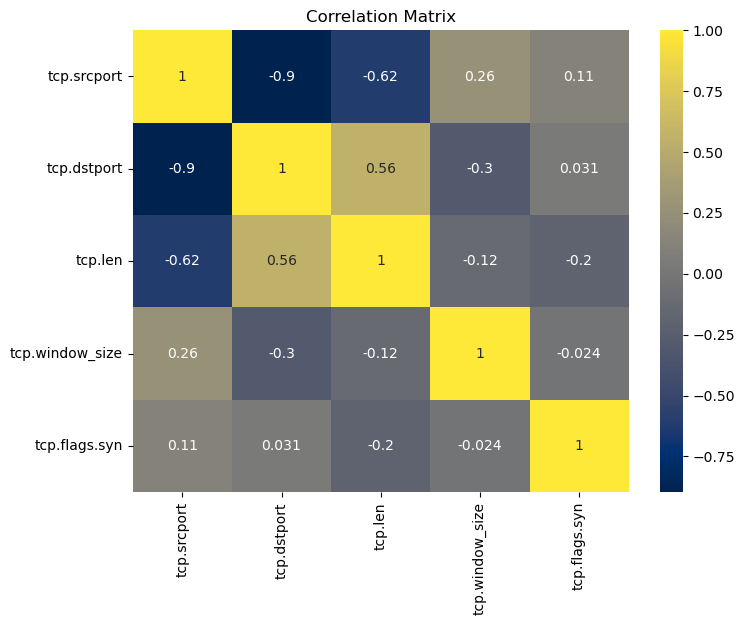

In [40]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()


I will need to play with the features so that they look more like a gaussian distribution. will try to normalize the distribution of the features

 Below function takes a DataFrame and a list of features, applies various transformations to each feature, and plots them. This function will handle Yeo-Johnson, Z-score normalization, logarithmic, square root, and cube root transformations.

In [62]:
from sklearn.preprocessing import power_transform, StandardScaler


def transform_and_plot_with_stats(df, features):
    for feature in features:
        # Calculate original mean and standard deviation
        original_mean = df[feature].mean()
        original_std = df[feature].std()

        plt.figure(figsize=(18, 4))

        # Original Data Plot
        plt.subplot(1, 6, 1)
        sns.histplot(df[feature], kde=True)
        plt.axvline(original_mean, color='r', linestyle='--', label=f'Mean: {original_mean:.2f}')
        plt.axvline(original_mean + original_std, color='g', linestyle=':', label=f'Std Dev: {original_std:.2f}')
        plt.axvline(original_mean - original_std, color='g', linestyle=':')
        plt.title(f'Original: {feature}')
        plt.legend()

        # Define a function for plotting transformed data
        def plot_transformed_data(transformed_data, title):
            mean = np.mean(transformed_data)
            std = np.std(transformed_data)
            sns.histplot(transformed_data, kde=True)
            plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
            plt.axvline(mean + std, color='g', linestyle=':', label=f'Std Dev: {std:.2f}')
            plt.axvline(mean - std, color='g', linestyle=':')
            plt.title(title)
            plt.legend()

        # Yeo-Johnson Transformation
        plt.subplot(1, 6, 2)
        yeo_johnson_transformed = power_transform(df[[feature]], method='yeo-johnson')
        plot_transformed_data(yeo_johnson_transformed, f'Yeo-Johnson: {feature}')

        # Z-score Normalization
        plt.subplot(1, 6, 3)
        scaler = StandardScaler()
        standardized = scaler.fit_transform(df[[feature]])
        plot_transformed_data(standardized, f'Z-score: {feature}')

        # Log Transformation
        plt.subplot(1, 6, 4)
        df_log = np.log(df[[feature]] + 1 - df[[feature]].min())  # Shift to positive
        plot_transformed_data(df_log, f'Log: {feature}')

        # Square Root Transformation
        plt.subplot(1, 6, 5)
        df_sqrt = np.sqrt(df[[feature]] - df[[feature]].min() + 1)  # Shift to positive
        plot_transformed_data(df_sqrt, f'Square Root: {feature}')

        # Cube Root Transformation
        plt.subplot(1, 6, 6)
        df_cbrt = np.cbrt(df[[feature]] - df[[feature]].min() + 1)  # Shift to positive
        plot_transformed_data(df_cbrt, f'Cube Root: {feature}')

        plt.tight_layout()
        plt.show()


In [64]:
df.columns

Index(['tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.window_size',
       'tcp.flags.syn'],
      dtype='object')

TypeError: unsupported format string passed to Series.__format__

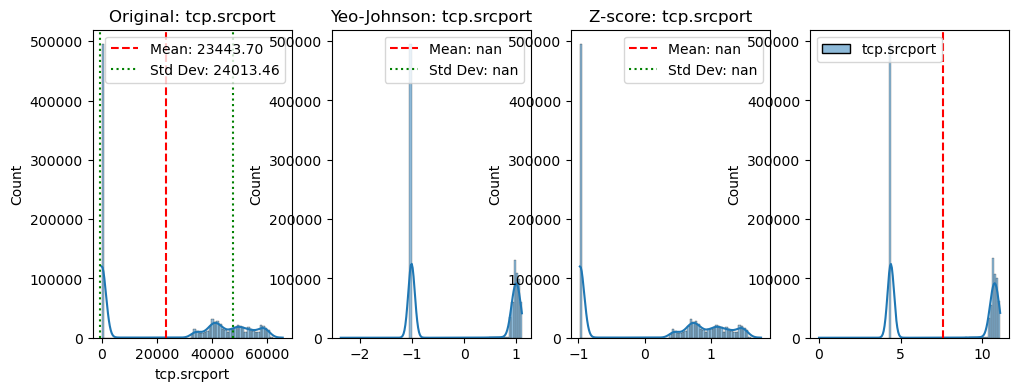

In [63]:
 # original df (before scaling)
transform_and_plot_with_stats(df, df.columns)
